/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo


Точность однослойного перцептрона: 0.9500

Лучшие параметры количества итераций и шага обновлений весов {'eta0': 0.01, 'max_iter': 10}


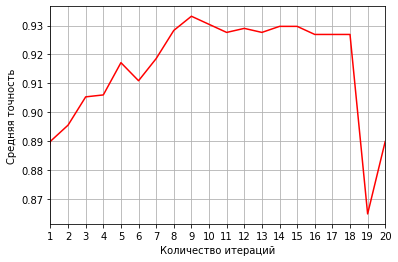

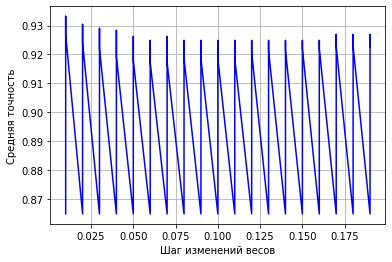

In [ ]:
# Загрузка необходимых библиотек
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron      # Однослойный перцептрон
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Функции визуализации
def vis_iter(scores):
  plt.xlabel('Количество итераций')
  plt.ylabel('Средняя точность')
  plt.xticks(range(1,21), [str(i) for i in range(1,21)])
  plt.xlim(1,20)
  plt.plot(scores, color='red')
  plt.grid()
  plt.show()

def vis_step(param_eta0,scores):
  plt.xlabel('Шаг изменений весов')
  plt.ylabel('Средняя точность')
  plt.plot(param_eta0,scores, color='blue')
  plt.grid()
  plt.show()


 # Загрузка набора данных mnist
mnist = datasets.load_digits()

 # Создание признаков и целевых меток
n_samples = len(mnist.images)
X = mnist.images.reshape((n_samples, -1))
y = mnist.target

 # Разделение данных: 80% обучающих данных; 
 #                    20% тестовых данных;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 # Стандартизация всех объектов так, 
 # чтобы они имели среднее значение равную нулю 
 # и единичную дисперсию
sc = StandardScaler()
sc.fit(X_train)

 # Стандартизация признаков
X_train_std = sc.transform(X_train)

 # Запись в переменную стандартизованных признаков,
 # для дальнейшего использования
X_test_std = sc.transform(X_test)

 # Создание однослойного перцептрона 
ppn = Perceptron(random_state=0)

# Перечень параметров автоподбора и его диапазона
parameters = {
    'max_iter': np.arange(1, 20, 1),
    'eta0': np.around(np.arange(0.01, 0.2, 0.01),decimals=2)
}

# Создание объекта перцептрона с автоподбором параметров
ppn_gr_cv = GridSearchCV(ppn, parameters)

 # Обучение перцептрона с автоподбором
ppn_gr_cv.fit(X_train_std, y_train)

 # Примениние обученного перцептрона к признакам, 
 # чтобы предсказать целевую метку
y_pred = ppn_gr_cv.best_estimator_.predict(X_test_std)

 # Вывод точности модели которая вычесляется по формуле: 
 # 1 - (наблюдения предсказанные неверно / общее количество наблюдений)
print('\nТочность однослойного перцептрона: %.4f' % accuracy_score(y_test, y_pred))
print("\nЛучшие параметры количества итераций и шага обновлений весов",
      ppn_gr_cv.best_params_)

# Средняя точность и вызов функции визуализации
scores = ppn_gr_cv.cv_results_['mean_test_score']
param_eta0 = ppn_gr_cv.cv_results_['param_eta0']

vis_iter(scores)
vis_step(param_eta0,scores)